<a href="https://colab.research.google.com/github/deva-kumari/devakumari_cse22237/blob/main/fds%20part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Results for /content/Blush part1 output.csv:
  Mean score: 0.9488320355951056
  Median score: 1.0
  Standard Deviation: 0.22046284991596155
  T-statistic: 129.04279708011936
  P-value: 0.0
----------------------------------------------------

Results for /content/Eyeshadow_final.xlsx:
  Mean score: 0.8832035595105673
  Median score: 1.0
  Standard Deviation: 0.3213563504144286
  T-statistic: 82.40503914318877
  P-value: 0.0
----------------------------------------------------

Results for /content/Foaming facewash_final.xlsx:
  Mean score: 0.932146829810901
  Median score: 1.0
  Standard Deviation: 0.25163376323552517
  T-statistic: 111.06961338004848
  P-value: 0.0
----------------------------------------------------

Results for /content/LipKit_final.xlsx:
  Mean score: 0.896551724137931
  Median score: 1.0
  Standard Deviation: 0.30471299860664386
  T-statistic: 88.21942340928481
  P-value: 0.0
----------------------------------------------------

Results for /content/bronzer output

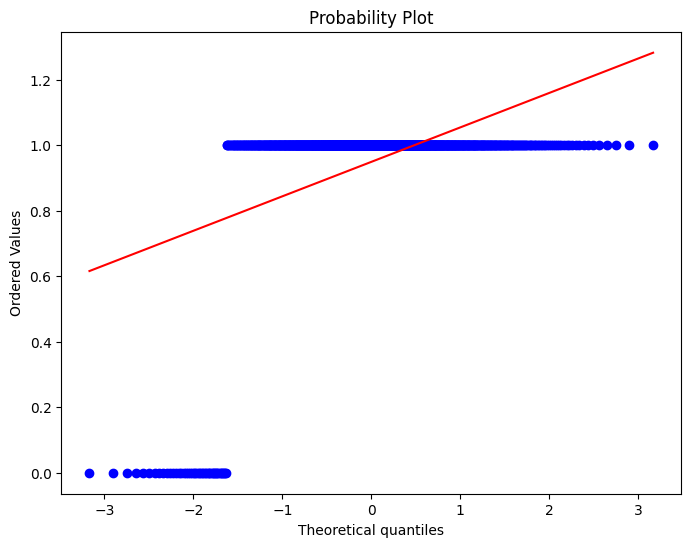

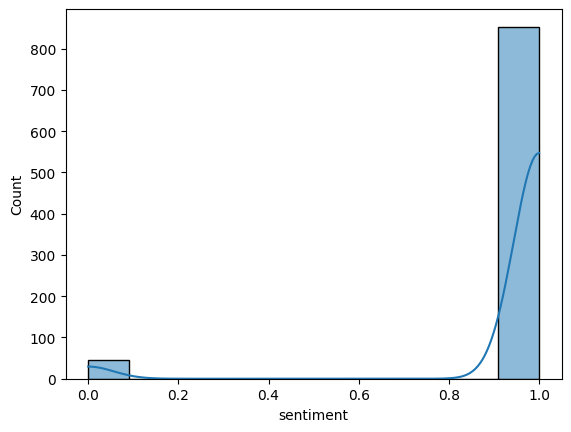

In [26]:
# List of corrected file paths
file_paths = [
    '/content/Blush part1 output.csv',
    '/content/Eyeshadow_final.xlsx',
    '/content/Foaming facewash_final.xlsx',
    '/content/LipKit_final.xlsx',
    '/content/bronzer output_part1.xlsx',
    '/content/eyecream output_part1.xlsx',
   '/content/highlighter output_part1.csv',
    '/content/matte liquid lipstick_final.xlsx',
   '/content/velvet liquid lipstick output_part1.csv',
   '/content/vitamin c serum part1 output.xlsx'
]

# Function to process each file (this part remains the same)
def process_file(file_path, benchmark_value):
    # Check file extension
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    else:
        print(f"Unsupported file format: {file_path}")
        return

    # Ensure the column 'sentiment' exists
    if 'sentiment' in df.columns:
        sentiment_scores = df['sentiment'].values
        mean_score = np.mean(sentiment_scores)
        median_score = np.median(sentiment_scores)
        std_dev = np.std(sentiment_scores, ddof=1)  # Sample standard deviation
        t_statistic, p_value = stats.ttest_1samp(sentiment_scores, benchmark_value)

        # Print results
        print(f"Results for {file_path}:")
        print(f"  Mean score: {mean_score}")
        print(f"  Median score: {median_score}")
        print(f"  Standard Deviation: {std_dev}")
        print(f"  T-statistic: {t_statistic}")
        print(f"  P-value: {p_value}")
        print("----------------------------------------------------\n")
    else:
        print(f"'sentiment' column not found in {file_path}")

# Process all files
# Process all files
for file_path in file_paths:
    process_file(file_path, benchmark_value)

# Shapiro-Wilk Test and Visualization
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Assuming you have your sentiment scores in a Pandas DataFrame
sentiment_scores = df['sentiment']

# Shapiro-Wilk Test
stat, p_value = shapiro(sentiment_scores)
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")

# Interpret the p-value
if p_value > 0.05:
    print("Data is normally distributed (Fail to reject H0).")
else:
    print("Data is not normally distributed (Reject H0).")

# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(sentiment_scores, dist="norm", plot=plt)
plt.show()

# Histogram
sns.histplot(sentiment_scores, kde=True)
plt.show()


In [47]:
import pandas as pd
from scipy.stats import levene

# List of file paths
file_paths = [
    '/content/Blush part1 output.csv'
]

# Function to standardize column names
def standardize_columns(df):
    # Convert all column names to lowercase and strip whitespace
    df.columns = df.columns.str.lower().str.strip()
    return df

# Function to process each file
def process_file(file_path, benchmark_value=0.5):  # Added a default value for benchmark_value
    # Check file extension and load DataFrame
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    else:
        print(f"Unsupported file format: {file_path}")
        return

    df = standardize_columns(df)  # Call the function to standardize column names

    # Print the columns to debug
    print(f"Columns in {file_path}: {df.columns.tolist()}")

    # Group sentiment scores by the "website name" column
    grouped_sentiments = [group['sentiment'] for name, group in df.groupby('website name')]

    # Levene's Test for equal variances
    stat, p_value = levene(*grouped_sentiments)
    print(f"Levene's Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")

    # Interpret the p-value
    if p_value > 0.05:
        print("Variances are equal (Fail to reject H0).")
    else:
        print("Variances are not equal (Reject H0).")

# Process all files
for file_path in file_paths:
    process_file(file_path)  # Call the function within the loop


Columns in /content/Blush part1 output.csv: ['product name', 'comment', 'website name', 'label', 'sentiment']
Levene's Test Statistic: 2.4247, P-Value: 0.1198
Variances are equal (Fail to reject H0).


In [48]:
import pandas as pd
import numpy as np
from scipy.stats import levene, shapiro, f_oneway, kruskal
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths
file_paths = [
    '/content/Blush part1 output.csv'
]

# Function to standardize column names
def standardize_columns(df):
    # Convert all column names to lowercase and strip whitespace
    df.columns = df.columns.str.lower().str.strip()
    return df

# Function to process each file
def process_file(file_path, benchmark_value=0.5):  # Added a default value for benchmark_value
    # Check file extension and load DataFrame
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    else:
        print(f"Unsupported file format: {file_path}")
        return

    df = standardize_columns(df)  # Standardize column names

    # Print the columns to debug
    print(f"Columns in {file_path}: {df.columns.tolist()}")

    # Group sentiment scores by the "website name" column
    grouped_sentiments = [group['sentiment'] for name, group in df.groupby('website name')]

    # Step 2: Check for normality using Shapiro-Wilk Test
    # Combine all sentiment scores into a single array for the normality test
    all_sentiment_scores = np.concatenate(grouped_sentiments)
    shapiro_stat, shapiro_p_value = shapiro(all_sentiment_scores)
    print(f"Shapiro-Wilk Test Statistic: {shapiro_stat:.4f}, P-Value: {shapiro_p_value:.4f}")

    # Step 3: Homogeneity of Variance Check using Levene's Test
    stat, p_value = levene(*grouped_sentiments)
    print(f"Levene's Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")

    # Interpret Levene's Test
    if p_value > 0.05:
        print("Variances are equal (Fail to reject H0).")
        # If data is normally distributed and variances are equal, perform ANOVA
        if shapiro_p_value > 0.05:
            f_statistic, anova_p_value = f_oneway(*grouped_sentiments)
            print(f"ANOVA F-Statistic: {f_statistic:.4f}, P-Value: {anova_p_value:.4f}")
            if anova_p_value < 0.05:
                print("Reject the null hypothesis: There is a significant difference between the groups.")
            else:
                print("Fail to reject the null hypothesis: No significant difference between the groups.")
        else:
            print("Data is not normally distributed. Consider non-parametric tests.")
    else:
        print("Variances are not equal (Reject H0).")
        # If data is not normally distributed or variances are not equal, perform Kruskal-Wallis H Test
        h_statistic, kruskal_p_value = kruskal(*grouped_sentiments)
        print(f"Kruskal-Wallis H Statistic: {h_statistic:.4f}, P-Value: {kruskal_p_value:.4f}")
        if kruskal_p_value < 0.05:
            print("Reject the null hypothesis: There is a significant difference between the groups.")
        else:
            print("Fail to reject the null hypothesis: No significant difference between the groups.")

# Process all files
for file_path in file_paths:
    process_file(file_path)  # Call the function within the loop


Columns in /content/Blush part1 output.csv: ['product name', 'comment', 'website name', 'label', 'sentiment']
Shapiro-Wilk Test Statistic: 0.2272, P-Value: 0.0000
Levene's Test Statistic: 2.4247, P-Value: 0.1198
Variances are equal (Fail to reject H0).
Data is not normally distributed. Consider non-parametric tests.


In [49]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths
file_paths = [
    '/content/Blush part1 output.csv'
]

# Function to standardize column names
def standardize_columns(df):
    # Convert all column names to lowercase and strip whitespace
    df.columns = df.columns.str.lower().str.strip()
    return df

# Function to process each file
def process_file(file_path):  # Removed benchmark_value since it's not needed
    # Check file extension and load DataFrame
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    else:
        print(f"Unsupported file format: {file_path}")
        return

    df = standardize_columns(df)  # Standardize column names

    # Group sentiment scores by the "website name" column
    grouped_sentiments = [group['sentiment'] for name, group in df.groupby('website name')]

    # Perform Kruskal-Wallis H Test
    h_statistic, kruskal_p_value = kruskal(*grouped_sentiments)
    print(f"Kruskal-Wallis H Statistic: {h_statistic:.4f}, P-Value: {kruskal_p_value:.4f}")

    if kruskal_p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference between the groups.")
    else:
        print("Fail to reject the null hypothesis: No significant difference between the groups.")

# Process all files
for file_path in file_paths:
    process_file(file_path)  # Call the function within the loop


Kruskal-Wallis H Statistic: 2.4209, P-Value: 0.1197
Fail to reject the null hypothesis: No significant difference between the groups.


Pearson Correlation between Sentiment and Comment Length: 0.1847, P-Value: 0.0000
Spearman Correlation between Sentiment and Comment Length: 0.1948, P-Value: 0.0000


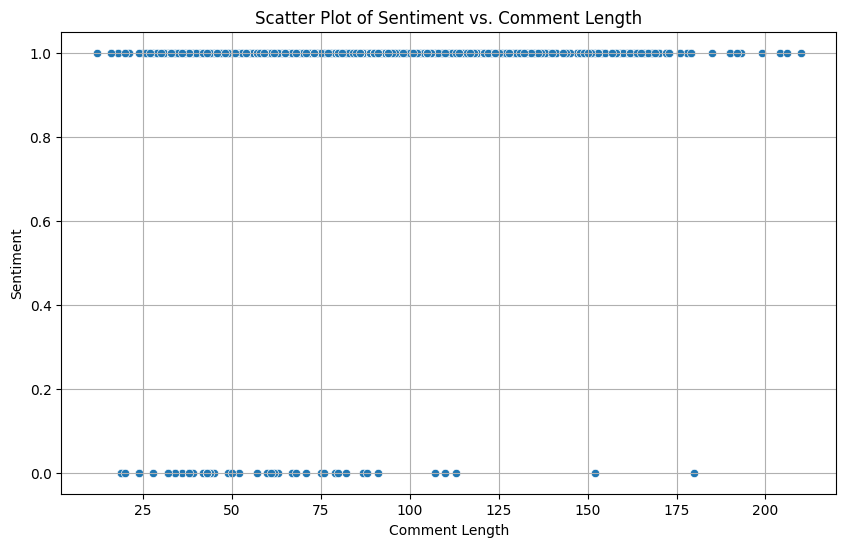

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Load your data
df = pd.read_csv('/content/Blush part1 output.csv')  # Update this path as needed

# Create additional variables if needed
# Calculate the comment length using the correct column name
df['comment_length'] = df['COMMENT'].apply(len)  # Updated to 'COMMENT'

# Checking correlations between sentiment and comment length
pearson_corr, pearson_p_value = pearsonr(df['sentiment'], df['comment_length'])
spearman_corr, spearman_p_value = spearmanr(df['sentiment'], df['comment_length'])

# Print the results
print(f"Pearson Correlation between Sentiment and Comment Length: {pearson_corr:.4f}, P-Value: {pearson_p_value:.4f}")
print(f"Spearman Correlation between Sentiment and Comment Length: {spearman_corr:.4f}, P-Value: {spearman_p_value:.4f}")

# Visualizing the correlation with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comment_length', y='sentiment', data=df)
plt.title('Scatter Plot of Sentiment vs. Comment Length')
plt.xlabel('Comment Length')  # Label for x-axis
plt.ylabel('Sentiment')  # Label for y-axis
plt.grid()  # Add a grid for better readability
plt.show()

# If you have timing information, you could create a variable like time of day or day of week
# Uncomment the following lines if you have timestamp data
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# df['hour'] = df['timestamp'].dt.hour
# df['day_of_week'] = df['timestamp'].dt.dayofweek

# Checking correlations between sentiment and timing (if applicable)
# pearson_corr_time, pearson_p_value_time = pearsonr(df['sentiment'], df['hour'])
# spearman_corr_time, spearman_p_value_time = spearmanr(df['sentiment'], df['hour'])
# print(f"Pearson Correlation between Sentiment and Hour of Day: {pearson_corr_time:.4f}, P-Value: {pearson_p_value_time:.4f}")
# print(f"Spearman Correlation between Sentiment and Hour of Day: {spearman_corr_time:.4f}, P-Value: {spearman_p_value_time:.4f}")

# Visualizing correlation with timing (if applicable)
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='hour', y='sentiment', data=df)
# plt.title('Scatter Plot of Sentiment vs. Hour of Day')
# plt.xlabel('Hour of Day')  # Label for x-axis
# plt.ylabel('Sentiment')  # Label for y-axis
# plt.grid()  # Add a grid for better readability
# plt.show()


In [54]:

import pandas as pd
# Load the CSV file
df = pd.read_csv('/content/Blush part1 output.csv')
# Create additional features (e.g., comment length)
df['comment_length'] = df['COMMENT'].apply(len)
import numpy as np
import scipy.stats as stats
# Calculate Pearson correlation coefficient and p-value
pearson_corr, pearson_p = stats.pearsonr(df['comment_length'], df['sentiment'])
# Calculate Spearman's rank correlation coefficient and p-value
spearman_corr, spearman_p = stats.spearmanr(df['comment_length'], df['sentiment'])
# Print results
print(f'Pearson Correlation Coefficient: {pearson_corr:.4f}')
print(f'Pearson p-value: {pearson_p:.4f}')
print(f'Spearman Correlation Coefficient: {spearman_corr:.4f}')
print(f'Spearman p-value: {spearman_p:.4f}')

Pearson Correlation Coefficient: 0.1847
Pearson p-value: 0.0000
Spearman Correlation Coefficient: 0.1948
Spearman p-value: 0.0000


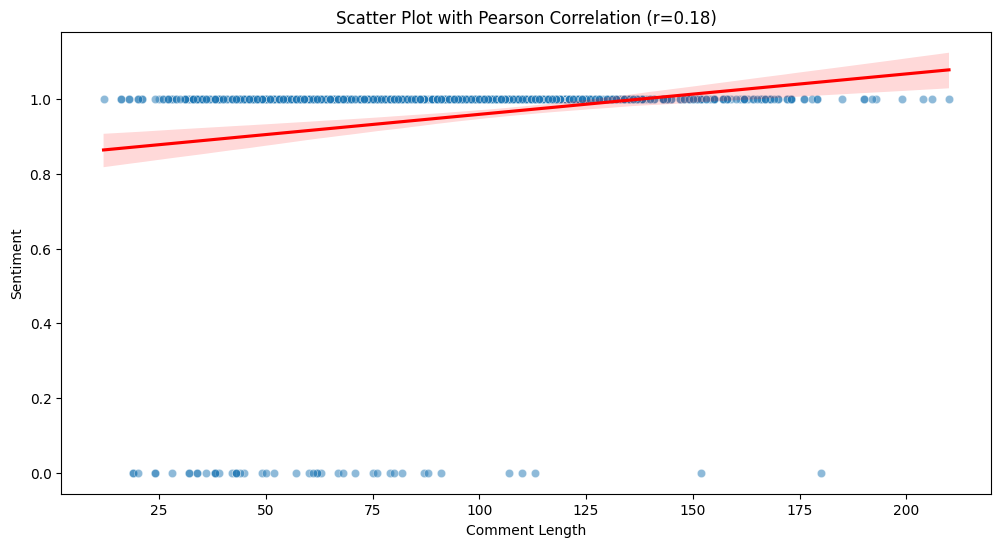

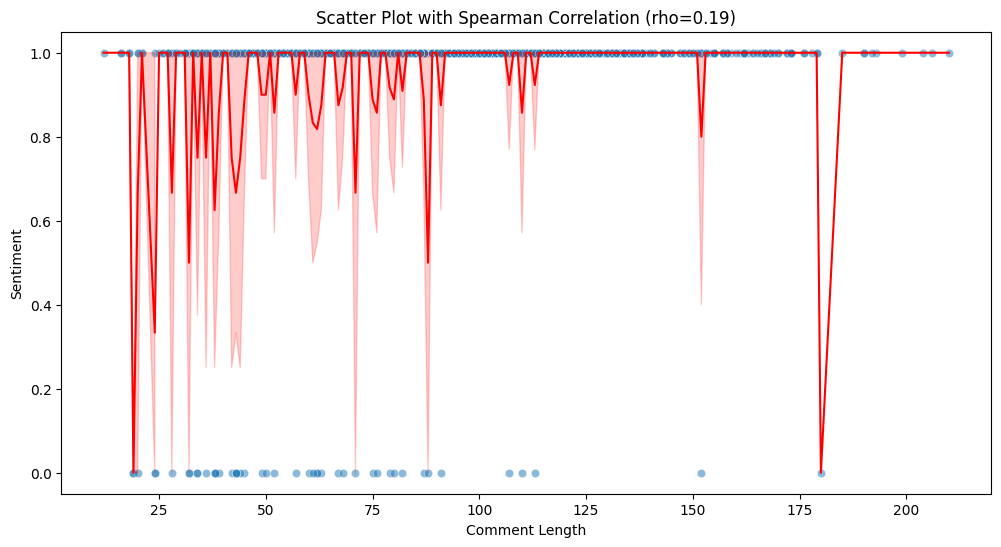

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot with Pearson correlation line
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='sentiment', data=df, alpha=0.5)
sns.regplot(x='comment_length', y='sentiment', data=df, scatter=False, color='r')
plt.title(f'Scatter Plot with Pearson Correlation (r={pearson_corr:.2f})')
plt.xlabel('Comment Length')
plt.ylabel('Sentiment')
plt.show()
# Scatter plot with Spearman correlation line (non-parametric)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='sentiment', data=df, alpha=0.5)
sns.lineplot(x='comment_length', y='sentiment',
data=df.sort_values(by='comment_length'), color='r')
plt.title(f'Scatter Plot with Spearman Correlation (rho={spearman_corr:.2f})')
plt.xlabel('Comment Length')
plt.ylabel('Sentiment')
plt.show()